<h1 style="font-size:3rem;color:0;">Jupyter Notebook Προσομοίωση τοιχοπληρώσεων</h1>

In [1]:
import math as m
import matplotlib.pyplot as plt
import numpy as np
import openseespy.opensees as ops
import opsvis as opsv




# Δεδομένα 



In [2]:

# Διαστάσεις φορέα 
L = 6 # Μήκος ανοίγματος L (m)
H_is = 3.25 # Ύψος ισογείου H (m)
H_or = 4.25 # Ύψος ορόφων H (m)

# Διαστάσεις Δοκών 
hb_is = 0.70 # Ύψος δοκού ισογείου Η (m) 
hb_or = 0.60 # Ύψος δοκού ορόφου Η (m) 
bw = 0.25 # Πλάτος δοκών b (m) 

# Διαστάσεις Στύλων  
bc_is = hc_is = 0.40 # Πλάτος Στύλοι ισογείου (m)
bc_or = hc_or = 0.35 # Πλάτος Στύλοι ορόφων (m)

# Υλικά 
# Σκυρόδεμα 
fcm = 21.6 # Mpa 
Ecm = 27700 # Mpa
# Χάλυβας 
fy = 456 # MPa
Es = 200 # GPa
cnom = 0.03  # επικάλυψη (m)
nu = 0.2 # Poisson

# Οπλισμός Δοκών ισογείου 
diam_is = 18 # Διάμετρος (mm)
numBarsTopBeam_is = 4 # Αριθμός διαμήκων ράβδων οπλισμού στη πάνω πλευρά
numBarsBotBeam_is = 2 # Αριθμός διαμήκων ράβδων οπλισμού στη κάτω πλευρά
numBarsBetwBeam_is = 6 # Αριθμός διαμήκων ράβδων οπλισμού στις ενδιάμεσες θέσεις άνω πλευρά  
numBarsBotBetwBeam_is = 3 # Αριθμός διαμήκων ράβδων οπλισμού στις ενδιάμεσες θέσεις κάτω πλευρά

# Οπλισμός Στύλων Ισογείου
diamcol_is = 18 # Διάμετρος (mm)
numbarsTopcol_is = 4 # Αριθμός ράβδων οπλισμού στη πάνω πλευρά
numBarsBotcol_is = 4 # Αριθμός ράβδων οπλισμού στη κάτω πλευρά
numbarsBetwcol_is = 2 # Αριθμός ράβδων ανάμεσα 

# Οπλισμός Δοκών ορόφων 
diam_or = 16 # Διάμετρος (mm)
numBarsTopBeam_or = 4 # Αριθμός διαμήκων ράβδων οπλισμού στη πάνω πλευρά
numBarsBotBeam_or = 2 # Αριθμός διαμήκων ράβδων οπλισμού στη κάτω πλευρά
numBarsBetwBeam_or = 6 # Αριθμός διαμήκων ράβδων οπλισμού στις ενδιάμεσες θέσεις άνω πλευρά  
numBarsBotBetwBeam_or = 3 # Αριθμός διαμήκων ράβδων οπλισμού στις ενδιάμεσες θέσεις κάτω πλευρά

# Οπλισμός Στύλων Ορόφου 
diamcol_or = 16 # Διάμετρος (mm)
numbarsTopcol_or = 4 # Αριθμός ράβδων οπλισμού στη πάνω πλευρά
numBarsBotcol_or = 4 # Αριθμός ράβδων οπλισμού στη κάτω πλευρά
numbarsBetwcol_or = 2 # Αριθμός ράβδων ανάμεσα 





# Φορτία δοκών 
g = 30.80 # kN/m
q = 10.50 # kN/m

# Τιμές για τον υπολογισμό Fwc,s και Fwv

# Μπορούμε να επιλέψουμε τιμές απο τον παρακάτω πίνακα αλλι΄ώς στην περίπτωση έλλειψης ακριβέστερων δεδομένων έχουμε : 

# Στην περίπτωση έλλειψης ακριβέστερων δεδομένων η χαρακτηριστική τιμή της θλιπτικής αντοχής της τοιχοποιίας κατά την κατακόρυφη διεύθυνση Fwc,k κατά τον ΕΚ 6
λm = 1.5 # Συντελεστής μετατροπής της χαρακτηριστικής αντοχής σε μέση
λs = 0.70 # Mειωτικός συντελεστής για την δυσμενή υπό γωνία εφαρμογή του φορτίου (0.60 εώς 0.90 στην περίπτωση που δεν διατίθενται ακριβέστερα στοιχεία)
λc = 1.2 # Aυξητικός συντελεστής για την ευμενή επιρροή της περίσφιγξης την οποίαν εξασφαλίζουν τα περιβάλλοντα την τοιχοπλήρωση δομικά στοιχεία οπλισμένου σκυροδέματος
fbc = 4 # Η θλιπτική αντοχή του τοιχοσώματος (3.1 έως 5.5) Mpa
fmc = 1.6 # Η θλιπτική αντοχή του κονιάματος (1.53 έως 1.75) Mpa
k_t1 = 0.45 # Εμπειρικός συντελεστής, ο οποίος λαμβάνει υπόψη την ομάδα στην οποία κατατάσσονται τα τοιχοσώματα και το είδος του κονιάματος δομήσεως (0.35 εώς 0.55)

k_t2 = 1000 # Εμπειρικός συντελεστής σύμφωνα με τον Ευρωκώδικα 6 (500 εώς 1000 φορές την θλιπτική αντο΄χή)

# Για την Διαγώνια Ρηγμάτωση Fwv
# ισχύει Fwc/Fwv = 0.15 

teff = 0.20 # Για ενιαίες κατά την διατομή όσο το t της τοιχοπλήρωσης σύμφωνα με τον Ευρωκώδικα 6 (m)

# Δείκτης πλαστιμότητας μ για τοιχοπληρώσεις
mplast = 2





## «Ερήμην» Αντιπροσωπευτικές Τιμές Αντοχής Τοιχοπληρώσεων. 

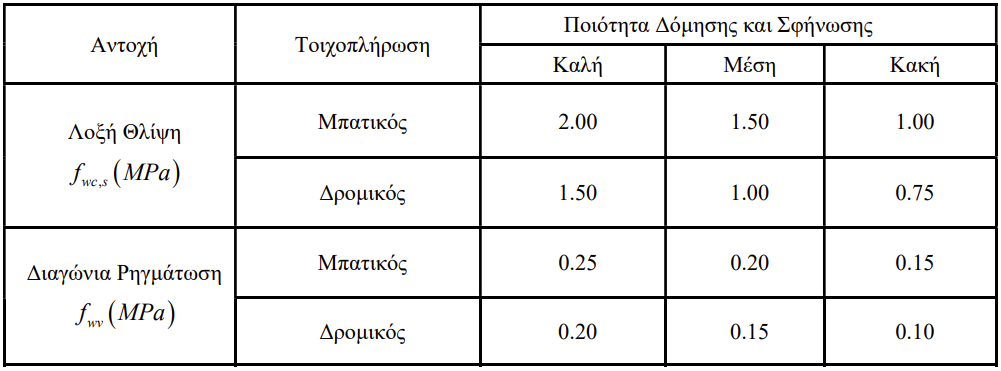

# Προσομοίωση Τοιχοπλήρωσης σύμφωνα με τον ΚΑΝ.ΕΠΕ.

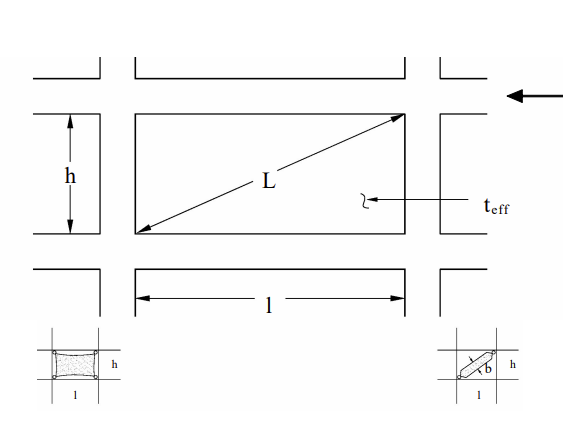

# Υπολογισμός διαστάσεων

In [3]:
#### Διαστάσεις θλιβόμενης ράβδου 
h_t_is = H_is - hb_is # Καθαρό ύψος τοιχοπλήρωσης ισογείου h (m)
h_t_or = H_or - hb_or # Καθαρό ύψος τοιχοπλήρωσης ορόφου h (m)
l_t_is = L - 2*bc_is # Καθαρό μήκος τοιχοπλήρωσης ισογείου l (m) 
l_t_or = L - 2*bc_or # Καθαρό μήκος τοιχοπλήρωσης ορόφου l (m)

# Διαστάσεις θλιβόμενης Διαγωνίου 

# Μήκος
L_diag_is = m.sqrt((l_t_is**2)+(h_t_is**2)) # Μήκος θλιβόμενης Διαγωνίου ισογείου L (m)
L_diag_or = m.sqrt((l_t_or**2)+(h_t_or**2)) # Μήκος θλιβόμενης Διαγωνίου ορόφου L (m)

#Πλάτος στην περίπτωση στάθμη επιτελεστικότητας Β (Σημαντικές Βλάβες)
b_diag_is = 0.15*L_diag_is # Πλάτος θλιβόμενης Διαγωνίου ισογείου b (m) 
b_diag_or = 0.15*L_diag_or # Πλάτος θλιβόμενης Διαγωνίου ορόφου b (m) 

# Λυγηρότητα της τοιχοποιίας 
lig = L/teff

# Γωνία 
a_is = m.atanh(h_t_is/l_t_is) 
a_or = m.atanh(h_t_or/l_t_or) 

a_isdeg = a_is*180/m.pi
a_ordeg = a_or*180/m.pi



print('')
print('Διαστάσεις θλιβόμενης Διαγωνίου Ισογείου:')
print(f'L Διαγωνίου ισογείου = {L_diag_is:.3f} m')
print(f'b Διαγωνίου ισογείου = {b_diag_is:.3f} m')
print(f'Γωνία α ισογείου= {a_isdeg:.3f}°')
print(f'Πάχος διαγωνίου ισογείου και ορόφου = {teff:.3f} m')
print('')
print('Διαστάσεις θλιβόμενης Διαγωνίου Ορόφου:')
print(f'L Διαγωνίου ορόφου  = {L_diag_or:.3f} m')
print(f'b Διαγωνίου ορόφου = {b_diag_or:.3f} m')
print(f'Γωνία α ορόφου= {a_ordeg:.3f}°')
print(f'Πάχος διαγωνίου ισογείου και ορόφου = {teff:.3f} m')
print('')
print(f'Λυγηρότητα της τοιχοποιίας = {lig:.3f}')





Διαστάσεις θλιβόμενης Διαγωνίου Ισογείου:
L Διαγωνίου ισογείου = 5.792 m
b Διαγωνίου ισογείου = 0.869 m
Γωνία α ισογείου= 30.743°
Πάχος διαγωνίου ισογείου και ορόφου = 0.200 m

Διαστάσεις θλιβόμενης Διαγωνίου Ορόφου:
L Διαγωνίου ορόφου  = 6.435 m
b Διαγωνίου ορόφου = 0.965 m
Γωνία α ορόφου= 48.440°
Πάχος διαγωνίου ισογείου και ορόφου = 0.200 m

Λυγηρότητα της τοιχοποιίας = 30.000


# Ανάλυση δυνάμεων 

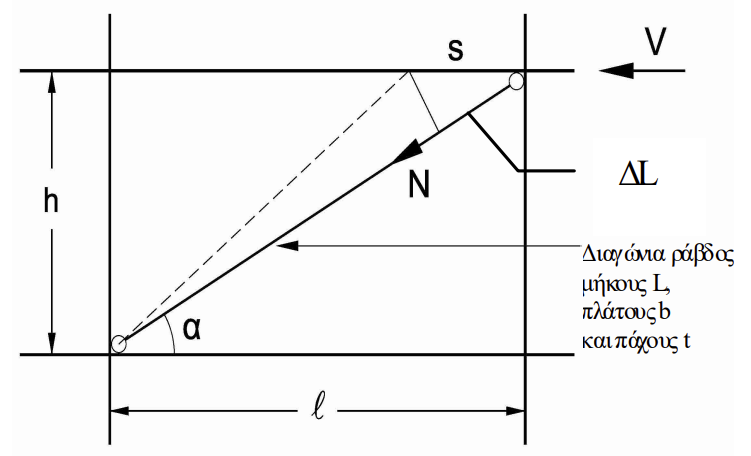

In [4]:
fwcs = λm*λs*λc*k_t1*(fbc**0.7)*(fmc**0.3) # Mpa 

fwv = 0.15*fwcs # Mpa 

Ew = (660/1000)*fwcs # Mpa

#Το εμβαδόν διατομής της τοιχοράβδου :
Ap_is = b_diag_is*teff # (m^2) (Ισογείου)
Ap_or = b_diag_or*teff # (m^2) (Ορόφου)

#Επιφάνεια φατνώματος :
Af_is = l_t_is*teff # (m^2) (Ισογείου)
Af_or = l_t_or*teff # (m^2) (Ορόφου)

#Η Μέγιστη αξονική θλιπτική δύναμη 
Ny_is = fwcs*Ap_is*1000 # kN (Ισογείου)
Ny_or = fwcs*Ap_or*1000 # kN (Ορόφου)

#Αξονική δύναμη V 
V_is = Af_is*fwv*1000 # kN (Ισογείου)
V_or = Af_or*fwv*1000 # kN (Ορόφου)


print('')
print(f'Μέτρο ελαστικότητας = {Ew:0.3f} Mpa')
print(f'Λοξή Θλίψη τοιχοπλήρωσης = {fwcs:.3f} Mpa')
print(f'Διαγώνια Ρηγμάτωση Fwv = {fwv:.3f} Mpa')
print('')
print('Ισογείου:')
print(f'Το εμβαδόν διατομής της τοιχοράβδου = {Ap_is:0.3f} m^2')
print(f'Επιφάνεια φατνώματος = {Af_is:0.3f} m^2')
print(f'Η Μέγιστη αξονική θλιπτική δύναμη ράβδου = {Ny_is:0.3f} kN')
print('')
print('Ορόφου:')
print(f'Το εμβαδόν διατομής της τοιχοράβδου = {Ap_or:0.3f} m^2')
print(f'Επιφάνεια φατνώματος = {Af_or:0.3f} m^2')
print(f'Η Μέγιστη αξονική θλιπτική δύναμη ράβδου = {Ny_or:0.3f} kN')



Μέτρο ελαστικότητας = 1.137 Mpa
Λοξή Θλίψη τοιχοπλήρωσης = 1.723 Mpa
Διαγώνια Ρηγμάτωση Fwv = 0.258 Mpa

Ισογείου:
Το εμβαδόν διατομής της τοιχοράβδου = 0.174 m^2
Επιφάνεια φατνώματος = 1.040 m^2
Η Μέγιστη αξονική θλιπτική δύναμη ράβδου = 299.351 kN

Ορόφου:
Το εμβαδόν διατομής της τοιχοράβδου = 0.193 m^2
Επιφάνεια φατνώματος = 1.060 m^2
Η Μέγιστη αξονική θλιπτική δύναμη ράβδου = 332.620 kN


# Ανάλυση μετακινήσεων 

In [5]:
# Μέτρο διάτμησης 
G_is = 0.15*Ew*10**3*((h_t_is*l_t_is)/(L_diag_is**2)) # (Ισογείου)
G_or = 0.15*Ew*10**3*((h_t_or*l_t_or)/(L_diag_or**2)) # (Ορόφου)

# Σχέσεις τάσεων – παραμορφώσεων πριν ή κατά τη ρηγμάτωση
taf_is = V_is/(teff*l_t_is) # (Ισογείου)
taf_or = V_or/(teff*l_t_or) # (Ορόφου)

sigma_is = Ny_is/(teff*b_diag_is) # (Ισογείου)
sigma_or = Ny_or/(teff*b_diag_or) # (Ορόφου)

# Η δυστένεια της ισοδύναμης θλιβόμενης ράβδου :
Diste_is = Ew*Ap_is*10**6 # kN (Ισογείου)  
Diste_or = Ew*Ap_or*10**6 # kN (Ορόφου) 

# H δυστμησία του φατνώματος
Distm_is = G_is*Af_is # kN (Ισογείου) 
Distm_or = G_or*Af_or # kN (Ισογείου) 

# Σχέση (ΚΑΝ.ΕΠΕ. §5.9.2):

Erabdou_is = (Diste_is/Ap_is)*(10**-6)
Erabdou_or = (Diste_or/Ap_or)*(10**-6)


print('')
print('Ισογείου:')
print(f'Μέτρο διάτμησης = {G_is:0.3f} Mpa')
print(f'Δυστένεια = {Diste_is:0.3f} kN')
print(f'Δυστμησία = {Distm_is:0.3f} kN')
print(f'Μέτρο Ελαστικότητας ράβδου = {Erabdou_is:0.3f} Gpa')
print('')
print('Ορόφου:')
print(f'Μέτρο διάτμησης = {G_or:0.3f} Mpa')
print(f'Δυστένεια = {Diste_or:0.3f} kN')
print(f'Δυστμησία = {Distm_or:0.3f} kN')
print(f'Μέτρο Ελαστικότητας ράβδου = {Erabdou_or:0.3f} Gpa')



Ισογείου:
Μέτρο διάτμησης = 67.429 Mpa
Δυστένεια = 197571.343 kN
Δυστμησία = 70.126 kN
Μέτρο Ελαστικότητας ράβδου = 1.137 Gpa

Ορόφου:
Μέτρο διάτμησης = 79.677 Mpa
Δυστένεια = 219529.032 kN
Δυστμησία = 84.458 kN
Μέτρο Ελαστικότητας ράβδου = 1.137 Gpa


# Διάγραμμα τάσεων - παραμορφώσεων ισοδύναμης θλιβόμενης διαγώνιας ράβδου άοπλης τοιχοπλήρωσης

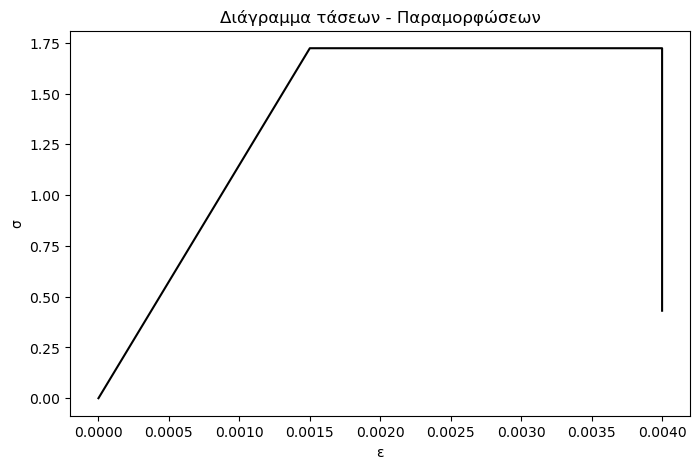

In [6]:
# Διάγραμμα τάσεων - παραμορφώσεων (τιμές απο το ΚΑΝ.ΕΠΕ §7.4.1)
ey = 0.0015 # Παραμόρφωση διαρροής
eu = 0.004 # Παραμόρφωση αστοχίας



# Data 
y = [0, fwcs, fwcs, 0.25*fwcs]
x = [0, ey, eu, eu]

# Plot
plt.figure(figsize=(8, 5))
plt.plot(x, y, marker='', linestyle='-',color='0', label="")

# Labels and Title
plt.xlabel("ε")
plt.ylabel("σ")
plt.title("Διάγραμμα τάσεων - Παραμoρφώσεων")
plt.show()






# Προσομοίωση καμπύλη ικανότητας τοιχοπλήρωσης

In [7]:
# Γωνιακή παραμόρφωση στη διαρροή
gy_is = (fwv/(G_is*0.01)) # (Ισογείου)
gy_or = (fwv/(G_or*0.01)) # (Ορόφου)

# Γωνιακή παραμόρφωση στην αστοχία 
gu_is = gy_is*mplast # (Ισογείου)
gu_or = gy_or*mplast # (Ορόφου)

# Οριζόντια μετακίνηση 
dy_is = gy_is*h_t_is # (Ισογείου)
dy_or = gy_or*h_t_or # (Ορόφου)

du_is = gu_is*h_t_is # (Ισογείου)
du_or = gu_or*h_t_or # (Ορόφου)

# Η τέμνουσα αντοχής της τοιχοπλήρωσης
VR_is = teff*l_t_is*fwv*1000 # (Ισογείου)
VR_or = teff*l_t_or*fwv*1000 # (Ορόφου)


print('')
print('Ισογείου:')
print(f'Γωνιακή παραμόρφωση διαρροής = {gy_is:0.3f} %')
print(f'Γωνιακή παραμόρφωση στην αστοχία   = {gu_is:0.3f} %')
print(f'Οριζόντια μετακίνηση  = {dy_is:0.5f} mm')
print(f'Οριζόντια μετακίνηση  στην αστοχία = {du_is:0.5f} mm')
print(f'Τέμνουσα αντοχής  = {VR_is:0.3f} kN')
print(f'')
print('Ορόφου:')
print(f'Γωνιακή παραμόρφωση στην αστοχία  = {gu_or:0.3f} %')
print(f'Γωνιακή παραμόρφωση διαρροής  = {gy_or:0.3f} %')
print(f'Οριζόντια μετακίνηση  = {dy_or:0.5f} mm')
print(f'Οριζόντια μετακίνηση στην αστοχία = {du_or:0.5f} mm')
print(f'Τέμνουσα αντοχής = {VR_or:0.3f} kN')



Ισογείου:
Γωνιακή παραμόρφωση διαρροής = 0.383 %
Γωνιακή παραμόρφωση στην αστοχία   = 0.767 %
Οριζόντια μετακίνηση  = 0.97735 mm
Οριζόντια μετακίνηση  στην αστοχία = 1.95469 mm
Τέμνουσα αντοχής  = 268.773 kN

Ορόφου:
Γωνιακή παραμόρφωση στην αστοχία  = 0.649 %
Γωνιακή παραμόρφωση διαρροής  = 0.324 %
Οριζόντια μετακίνηση  = 1.18389 mm
Οριζόντια μετακίνηση στην αστοχία = 2.36778 mm
Τέμνουσα αντοχής = 273.942 kN


# Διάγραμμα καμπύλης ικανότητας 

# Ισογείου 

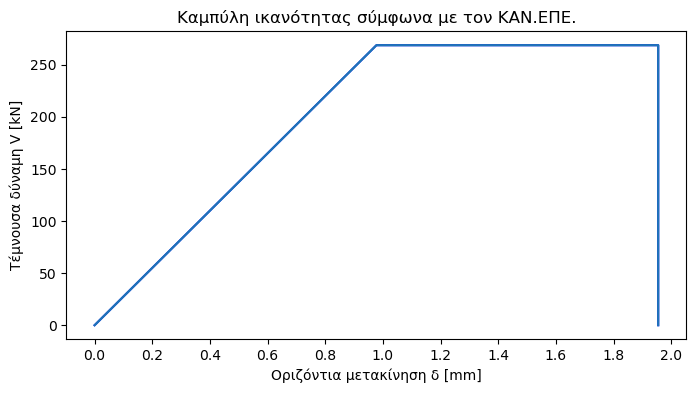

In [8]:
# Data 
y = [0, VR_is, VR_is, 0]
x = [0, dy_is, du_is, du_is]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='', linestyle='-',color='b', label="")

# Labels and Title
plt.xlabel("Οριζόντια μετακίνηση δ [mm]")
plt.ylabel("Τέμνουσα δύναμη V [kN]")
plt.title("Καμπύλη ικανότητας σύμφωνα με τον ΚΑΝ.ΕΠΕ.")
plt.plot(x, y)
plt.xticks(np.arange(0, 2.2, 0.2))   
plt.yticks(np.arange(0, 300, 50)) 
plt.show()


# Ορόφου 

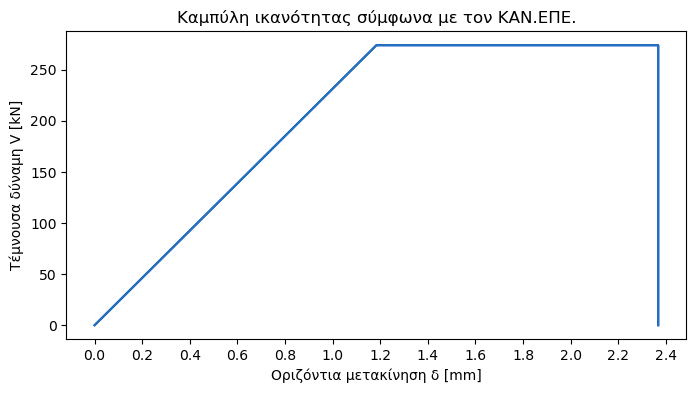

In [9]:
# Data 
y = [0, VR_or, VR_or, 0,]
x = [0, dy_or, du_or, du_or, ]

# Plot
plt.figure(figsize=(8, 4))
plt.plot(x, y, marker='', linestyle='-',color='b', label="")

# Labels and Title 
plt.xlabel("Οριζόντια μετακίνηση δ [mm]")
plt.ylabel("Τέμνουσα δύναμη V [kN]")
plt.title("Καμπύλη ικανότητας σύμφωνα με τον ΚΑΝ.ΕΠΕ.")
plt.plot(x, y)
plt.xticks(np.arange(0, 2.5, 0.2))   
plt.yticks(np.arange(0, 300, 50)) 
plt.show()



# Προσομοίωση της τοιχοπλήρωσης στην ανελαστική περιοχή με την βοήθεια του μοντέλου Crisafulli

![alt text](crisafulli-1-1.png)
<h1 style="font-size:1rem;color:0;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp; (α) Υστερητική συμπεριφορά θλιπτήρα ελκυστήρα , (β) Ανελαστικό μοντέλο Crisafulli </h1>


<h1 style="font-size:3rem;color:0;"> Δεδομένα  </h1>

In [10]:
# Για να προσομοιωθεί σωστά πρέπει να οριστούν οι μηχανικές και γεωμετρικές παράμετροι 

fmth = 5 # (Mpa) θλιπτική αντοχή τοιχοπλήρωσης σε θλίψη (3.5 Mpa εώς 5 Mpa)
Em = 700*fmth # (Mpa) Αρχικό μέτρο ελαστικότητας της τοιχοπλήρωσης (400*fmth έως 1000*fmth)≈(5000 Mpa εώς 3500 Mpa)
ft = 0.575 # (Mpa) εφελκυστική αντοχή τοιχοπλήρωσης (μπορεί να θεωρηθεί και μηδενική)
em = 0.003 # Η παραμόργωση στην μέγιστη τάση (0.001 έως 0.005)
eult = 20*em # Τελική παραμόρφωση (χρησιμοποιείται για τον έλεγχο του φθίνοντος κλάδου της καμπύλης τάσης-παραμόρφωσης)
ecl = 0.003 # Παραμόρφωση "κλεισίματος" ορίζει την καταπόνηση στην οποία οι ρωγμές κλείνουν μερικώς επιτρέποντας την ανάπτυξη θλιπτικών τάσεων (0 έως 0.003)
e1 = 0.0006 # η παραμόρφωση απομείωσης της επιφάνειας του θλιπτήρα (0.0003 έως 0.0008)
e2 = 0.010 # η απομένουσα παραμόρφωση της επιφάνειας του θλιπτήρα (0.0006 έως 0.016)

# Εμπειρικές παράμετροι 

gun = 2 # συντελεστής δυσκαμψίας στην έναρξη της αποφόρτισης (1.5 έως 2.5)
are = 0.3 # προβλέπει την παραμόρφωση επαναφόρτισης (0.2 έως 0.4)
ach = 0.45 # προβλέπει την παραμόρφωση στο σημείο καμπής (0.3 έως 0.6)
ba = 1.75 # συντελεστής παραμόρφωσης πλήρους αποφόρτισης  (1.5 έως 2)
bch = 0.65 # συντελεστής τάσης σημείου καμπής (0.6 έως 0.7)
gplu = 0.6 # συντελεστής δυσκαμψίας μηδενισμού τάσης (0.5 έως 0.7)
gplr = 1.3 # συντελεστής δυσκαμψίας επαναφόρτισης (1.1 έως 1.5)
ex1 = 1.75 # συντελεστής δυσκαμψίας πλαστικής αποφόρτισης (1.5 έως 2)
ex2 = 1.25 # συντελεστής δυσκαμψίας επαναλαμβανόμενου κύκλου (1 έως 1.5)
gs = 0.6 # αναλογία της ακαμψίας στο διατμητικό ελατήριο (0.5 έως 0.75)
a_s = 1.55 # μειωτικός συντελεστής διάτμησης (1.4 έως 1.65)

### Δεδομένα για τον υπολογισμό της παραμέτρου δυσκαμψίας λ 

Ec = 27700000 # (kN/m^2) Μέτρο ελαστικότητας υποστυλωμάτων




# Υπολογισμός

In [11]:
Ic_is = (1/12)*(bc_is**4) # (m^4) Ροπή αδράνειας υποστυλώματος (ισογείου)
Ic_or = (1/12)*(bc_or**4) # (m^4) Ροπή αδράνειας υποστυλώματος (ορόφου)

λ_is = ((Em*10**3*teff*m.sin(a_is*2))/(4*Ec*Ic_is*h_t_is))**0.25 # αδιάστατη παράμετρος δυσκαμψίας (ισογείου)
λ_or = ((Em*10**3*teff*m.sin(a_or*2))/(4*Ec*Ic_or*h_t_or))**0.25 # αδιάστατη παράμετρος δυσκαμψίας (ορόφου)

z_is = (m.pi)/(2*λ_is) # (m) μήκος επαφής (ισογείου)
z_or = (m.pi)/(2*λ_is) # (m) μήκος επαφής (ορόφου)


# by Stafford Smith
minhz_is =((1/3)*z_is)/h_t_is  # Ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου
maxhz_is =((1/2)*z_is)/h_t_is  # -//-
minhz_or =((1/3)*z_or)/h_t_or # Ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου
maxhz_or =((1/2)*z_or)/h_t_or  # -//-

maxxhz_is = max(minhz_is*100, maxhz_is*100)
hz_is = round(maxxhz_is/5)*5
maxxhz_or = max(minhz_or*100, maxhz_or*100)
hz_or = round(maxxhz_or/5)*5

#Επιφάνεια Θλιπτίρων
A1_is = teff*b_diag_is # (m^2) εμβαδόν της επιφάνειας του πρώτου θλιπτήρα (ισογείου)
A2_is = A1_is*0.4 # (m^2) εμβαδόν της επιφάνειας του δεύτερου θλιπτήρα (ισογείου)
A1_or = teff*b_diag_or # (m^2) εμβαδόν της επιφάνειας του πρώτου θλιπτήρα (ορόφου)
A2_or = A1_or*0.4 # (m^2) εμβαδόν της επιφάνειας του δεύτερου θλιπτήρα (ορόφου)

#Οριζόντια και κατακόρυφη μετάθεση

Hz_is = (hz_is/100)*h_t_is
Hz_or = (hz_or/100)*h_t_or

X0_is = 1/2 * ((l_t_is-Hz_is)*m.cos(a_is))
Y0_is = 1/2 * ((h_t_is-Hz_is)*m.sin(a_is))

X0_or = 1/2 * ((l_t_or-Hz_or)*m.cos(a_or))
Y0_or = 1/2 * ((h_t_or-Hz_or)*m.sin(a_or))

#Ποσοστό
X0_p_is = (X0_is/l_t_is)*100
Y0_p_is = (Y0_is/h_t_is)*100

X0_p_or = (X0_or/l_t_or)*100
Y0_p_or = (Y0_or/h_t_or)*100


print('Ισογείου:')
print(f'Η παράμετρος δυσκαμψίας λ = {λ_is:0.3f} ')
print(f'Το πραγματικό μήκος επαφής z = {z_is:0.3f} m')
print(f'Το ελάχιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = {minhz_is*100:0.3f} %')
print(f'Το μέγιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = {maxhz_is*100:0.3f} %')
print(f'Επιλέγεται hz = {hz_is:0.3f} %')
print(f'Οριζόντια μετάθεση = {X0_p_is:0.3f} %')
print(f'Κατακόρυφη μετάθεση = {Y0_p_is:0.3f} %')
print(f'')
print('Ορόφου:')
print(f'Η παράμετρος δυσκαμψίας λ = {λ_or:0.3f} ')
print(f'Το πραγματικό μήκος επαφής z = {z_or:0.3f} m')
print(f'Το ελάχιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = {minhz_or*100:0.3f} %')
print(f'Το μέγιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = {maxhz_or*100:0.3f} %')
print(f'Επιλέγεται hz = {hz_or:0.3f}%')
print(f'Οριζόντια μετάθεση = {X0_p_or:0.3f} %')
print(f'Κατακόρυφη μετάθεση = {Y0_p_or:0.3f} %')





Ισογείου:
Η παράμετρος δυσκαμψίας λ = 1.005 
Το πραγματικό μήκος επαφής z = 1.563 m
Το ελάχιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = 20.430 %
Το μέγιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = 30.644 %
Επιλέγεται hz = 30.000 %
Οριζόντια μετάθεση = 36.651 %
Κατακόρυφη μετάθεση = 17.892 %

Ορόφου:
Η παράμετρος δυσκαμψίας λ = 1.083 
Το πραγματικό μήκος επαφής z = 1.563 m
Το ελάχιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = 14.273 %
Το μέγιστο ισοδύναμο μήκος επαφής του κατακόρυφου ύψος του πλαισίου = 21.409 %
Επιλέγεται hz = 20.000%
Οριζόντια μετάθεση = 28.601 %
Κατακόρυφη μετάθεση = 29.930 %


![alt text](<Υστεριτική καμπύλη τέμνουσας – ανελαστικό μοντέλο προσομοίωσης.png>)
<h1 style="font-size:1rem;color:0;">&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Διάγραμμα τάσεων Crisafulli  </h1>

# Επίλυση με το OpenSees

u10 = 7.764375952124813e-05
u12 = 7.6544944279368e-05


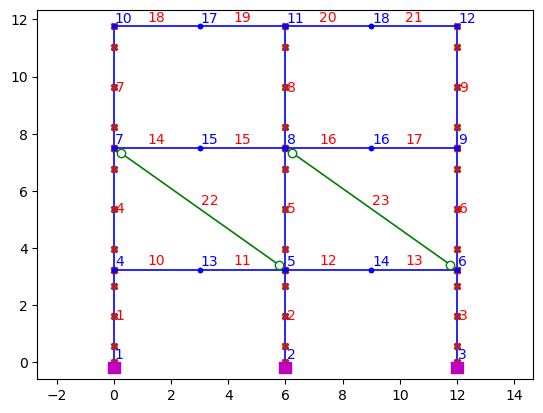

In [ ]:

# Model
ops.wipe()
ops.model('basic','-ndm', 2,'-ndf', 3)

# Κόμβοι
ops.node(1,0,0)
ops.node(2,L,0)
ops.node(3,2*L,0)
ops.node(4,0,H_is)
ops.node(13,L/2,H_is)
ops.node(5,L,H_is)
ops.node(14,L+(L/2),H_is)
ops.node(6,2*L,H_is)
ops.node(7,0,H_is+H_or)
ops.node(15,L/2,H_is+H_or)
ops.node(8,L,H_is+H_or)
ops.node(16,L+(L/2),H_is+H_or)
ops.node(9,2*L,H_is+H_or)
ops.node(10,0,H_is+2*H_or)
ops.node(17,L/2,H_is+2*H_or)
ops.node(11,L,H_is+2*H_or)
ops.node(18,L+(L/2),H_is+2*H_or)
ops.node(12,2*L,H_is+2*H_or)

# Στηρίξεις 
ops.fix(1, 1, 1, 1)
ops.fix(2, 1, 1, 1)
ops.fix(3, 1, 1 ,1)


# =====================================================================================
# Μονάδες και Σταθερές  
# =====================================================================================

metra = 1.0;
kN = 1.0;
sec = 1.0;
m2 = metra*metra;
kPa = kN/(metra**2);
MPa = 1000*kPa;
GPa = 1000*MPa;

# Σταθερές
g = 9.81*metra/(sec**2);

# Υλικό & Διατομή 

# Υλικά  

# Σκυρόδεμα 
fcm_pa = fcm*10**5  # Pa 
Ecm_pa = 277*10**6# Pa
fcu_pa = fcm_pa*0.2 # Pa 
ft_pa = fcm_pa*0.1 # Pa 
nu = 0.2 # Poisson
Gc = Ecm_pa / (2 * (1 + nu)) # Μέτρο διάτμησης
ec0bet = -0.004 # Παραμόρφωση στην μέγιστη αντοχή 
ecusbet = -0.014 # Παραμόρφωση στην οποία επιτυγχάνεται η υπολειπόμενη αντοχή
ec0cnom = -0.002 
ecucnom = -0.006
lamda = 0.1 # Λόγος εξασθένησης  
Ets = 0.1*Ecm_pa
# cnom

# Χάλυβας 
fy_pa = fy*10**6 # Pa
Es_pa = Es*10**9 # Pa 
sth = 0.01 # Συντελεστής σκλήρυνσης
Gs = Es_pa/(1+nu) # Μέτρο διάτμησης
b = 0.10        #  Λόγος σκλήρυνσης παραμόρφωσης
R0 = 18.0
cR1 = 0.925
cR2 = 0.15
a1 = 0.05
a2 = 1.00
a3 = 0.05
a4 = 1.0
sigInit = 0.0
alpha = 0.05
params = [R0, cR1, cR2]  # R0,cR1,cR2


# Διαστάσεις φορέα 
# L = 6 # Μήκος ανοίγματος L (m)
# H_is = 3.25 # Ύψος ισογείου H (m)
# H_or = 4.25 # Ύψος ορόφων H (m)

##Υποστυλώματα 
# bc_is = hc_is = 0.40 # Πλάτος Στύλων ισογείου (m)
# bc_or = hc_or = 0.35 # Πλάτος Στύλων ορόφων (m)
# Ic_is # Ροπή αδράνειας m^4
# Ic_or # Ροπή αδράνειας m^4
Ac_is = bc_is**2 # εμβαδόν διατομής m^2
Ac_or = bc_or**2 # εμβαδόν διατομής m^2


##Δοκάρια
# hb_is = 0.70 # Ύψος δοκού ισογείου Η (m) 
# hb_or = 0.60 # Ύψος δοκού ορόφου Η (m) 
# bw = 0.25 # Πλάτος δοκών b (m) 
Icb_is = (bw)*(hb_is**3)/12 # Ροπή αδράνειας m^4
Icb_or = (bw)*(hb_or**3)/12 # Ροπή αδράνειας m^4
Ab_is = bw*hb_is # εμβαδόν διατομής m^2
Ab_or = bw*hb_or # εμβαδόν διατομής m^2

##Τοιχοπλήρωση 
# Ew 
# Fwcs
# A

# =====================================================================================
# Ορισμός Υλικών
# =====================================================================================

ops.uniaxialMaterial('Concrete02', 1, fcm_pa, ec0bet, fcu_pa, ecusbet, lamda, ft_pa, Ets) # Σκυρόδεμα 
ops.uniaxialMaterial('Concrete02', 2, -0.7*fcm_pa,ec0cnom, fcu_pa, ecusbet, lamda, ft_pa, Ets) # Επικάλυψη
ops.uniaxialMaterial('Steel02', 3, fy_pa, Es_pa, sth, R0, cR1, cR2, a1, a2, a3, a4, sigInit) # Χάλυβας 
ops.uniaxialMaterial('Elastic', 4, Ew)




# =====================================================================================
# Ορισμός Διατομών
# =====================================================================================

# =====================================================================================
# Υποστυλώματα
# =====================================================================================

Ascol_is = ((m.pi)*(diamcol_is/1000)**2)/4
Ascol_or = ((m.pi)*(diamcol_or/1000)**2)/4

# Ισογείου 

y1_is = bc_is / 2 
z1_is = hc_is / 2

ops.section('Fiber', 1)

# Πυρήνας σκυροδέματος 
ops.patch('rect', 1, 10, 1, cnom - y1_is, cnom - z1_is, y1_is - cnom, z1_is - cnom)

# Επικάλυψη 
ops.patch('rect', 2, 10, 1, -y1_is, z1_is - cnom, y1_is, z1_is)
ops.patch('rect', 2, 10, 1, -y1_is, -z1_is, y1_is, cnom - z1_is)
ops.patch('rect', 2, 2, 1, -y1_is, cnom - z1_is, cnom - y1_is, z1_is - cnom)
ops.patch('rect', 2, 2, 1, y1_is - cnom, cnom - z1_is, y1_is, z1_is - cnom)

# Οπλισμοί
ops.layer('straight', 3, numbarsTopcol_is, Ascol_is, y1_is - cnom, z1_is - cnom, y1_is - cnom, cnom - z1_is)
ops.layer('straight', 3, numbarsBetwcol_is, Ascol_is, 0.0, z1_is - cnom, 0.0, cnom - z1_is)
ops.layer('straight', 3, numBarsBotcol_is, Ascol_is, cnom - y1_is, z1_is - cnom, cnom - y1_is, cnom - z1_is)

# Ορόφου

y1_or = bc_or / 2
z1_or = hc_or / 2

ops.section('Fiber', 2) # tag 2 για τα υποστυλώματα 

# Πυρήνας σκυροδέματος
ops.patch('rect', 1, 10, 1, cnom - y1_or, cnom - z1_or, y1_or - cnom, z1_or - cnom)

# Επικάλυψη
ops.patch('rect', 2, 10, 1, -y1_or, z1_or - cnom, y1_or, z1_or)
ops.patch('rect', 2, 10, 1, -y1_or, -z1_or, y1_or, cnom - z1_or)
ops.patch('rect', 2, 2, 1, -y1_or, cnom - z1_or, cnom - y1_or, z1_or - cnom)
ops.patch('rect', 2, 2, 1, y1_or - cnom, cnom - z1_or, y1_or, z1_or - cnom)

# Οπλισμοί
ops.layer('straight', 3, numbarsTopcol_or, Ascol_or, y1_or - cnom, z1_or - cnom, y1_or - cnom, cnom - z1_or)
ops.layer('straight', 3, numbarsBetwcol_or, Ascol_or, 0.0, z1_or - cnom, 0.0, cnom - z1_or)
ops.layer('straight', 3, numBarsBotcol_or, Ascol_or, cnom - y1_or, z1_or - cnom, cnom - y1_or, cnom - z1_or)

# =====================================================================================
# Δοκάρια 
# =====================================================================================

Asbeam_is = ((m.pi)*(diam_is/1000)**2)/4
Asbeam_or = ((m.pi)*(diam_or/1000)**2)/4

# Ακραία στήριξη ισογείου

# Ορισμός διατομής δοκού ισογείου
ops.section('Fiber', 3)  # tag 3 για τη δοκό ισογείου Ακραία στήριξη

# Πυρήνας σκυροδέματος 
ops.patch('rect', 1, 10, 1, cnom - bw/2, cnom - bw, hb_is/2 - cnom, bw - cnom)

# Επικάλυψη
ops.patch('rect', 2, 10, 1, -hb_is/2, bw/2 - cnom, hb_is/2, bw/2)
ops.patch('rect', 2, 10, 1, -hb_is/2, -bw/2, hb_is/2, cnom - bw/2)
ops.patch('rect', 2, 2, 1, -hb_is/2, cnom - bw/2, cnom - hb_is/2, bw/2 - cnom)
ops.patch('rect', 2, 2, 1, hb_is/2 - cnom, cnom - bw/2, hb_is/2, bw/2 - cnom)

# Οπλισμοί
ops.layer('straight', 3, numBarsTopBeam_is, Asbeam_is, -hb_is/2 + cnom, bw/2 - cnom, hb_is/2 - cnom, bw/2 - cnom)  # Πάνω οπλισμός
ops.layer('straight', 3, numBarsBotBeam_is, Asbeam_is, -hb_is/2 + cnom, cnom - bw/2, hb_is/2 - cnom, cnom - bw/2)  # Κάτω οπλισμός

# Μεσαία στήριξη ισογείου

# Ορισμός διατομής δοκού ισογείου
ops.section('Fiber', 4)  # tag 4 για τη δοκό ισογείου Μεσαία στήριξη

# Πυρήνας σκυροδέματος 
ops.patch('rect', 1, 10, 1, cnom - bw/2, cnom - bw, hb_is/2 - cnom, bw - cnom)

# Επικάλυψη
ops.patch('rect', 2, 10, 1, -hb_is/2, bw/2 - cnom, hb_is/2, bw/2)
ops.patch('rect', 2, 10, 1, -hb_is/2, -bw/2, hb_is/2, cnom - bw/2)
ops.patch('rect', 2, 2, 1, -hb_is/2, cnom - bw/2, cnom - hb_is/2, bw/2 - cnom)
ops.patch('rect', 2, 2, 1, hb_is/2 - cnom, cnom - bw/2, hb_is/2, bw/2 - cnom)

# Οπλισμοί
ops.layer('straight', 3, numBarsBetwBeam_is, Asbeam_is, -hb_is/2 + cnom, bw/2 - cnom, hb_is/2 - cnom, bw/2 - cnom)  # Πάνω οπλισμός
ops.layer('straight', 3, numBarsBotBetwBeam_is, Asbeam_is, -hb_is/2 + cnom, cnom - bw/2, hb_is/2 - cnom, cnom - bw/2)  # Κάτω οπλισμός

# Ακραία στήριξη Ορόφου

# Ορισμός διατομής δοκού Ορόφου
ops.section('Fiber', 5)  # tag 5 για τη δοκό Ορόφου Ακραία στήριξη

# Πυρήνας σκυροδέματος 
ops.patch('rect', 1, 10, 1, cnom - bw/2, cnom - bw, hb_or/2 - cnom, bw - cnom)

# Επικάλυψη
ops.patch('rect', 2, 10, 1, -hb_or/2, bw/2 - cnom, hb_or/2, bw/2)
ops.patch('rect', 2, 10, 1, -hb_or/2, -bw/2, hb_or/2, cnom - bw/2)
ops.patch('rect', 2, 2, 1, -hb_or/2, cnom - bw/2, cnom - hb_or/2, bw/2 - cnom)
ops.patch('rect', 2, 2, 1, hb_or/2 - cnom, cnom - bw/2, hb_or/2, bw/2 - cnom)

# Οπλισμοί
ops.layer('straight', 3, numBarsTopBeam_or, Asbeam_or, -hb_or/2 + cnom, bw/2 - cnom, hb_or/2 - cnom, bw/2 - cnom)  # Πάνω οπλισμός
ops.layer('straight', 3, numBarsBotBeam_or, Asbeam_or, -hb_or/2 + cnom, cnom - bw/2, hb_or/2 - cnom, cnom - bw/2)  # Κάτω οπλισμός

# Μεσαία στήριξη Ορόφου

# Ορισμός διατομής δοκού Ορόφου
ops.section('Fiber', 6)  # tag 6 για τη δοκό Ορόφου Μεσαία στήριξη

# Πυρήνας σκυροδέματος 
ops.patch('rect', 1, 10, 1, cnom - bw/2, cnom - bw, hb_or/2 - cnom, bw - cnom)

# Επικάλυψη
ops.patch('rect', 2, 10, 1, -hb_or/2, bw/2 - cnom, hb_or/2, bw/2)
ops.patch('rect', 2, 10, 1, -hb_or/2, -bw/2, hb_or/2, cnom - bw/2)
ops.patch('rect', 2, 2, 1, -hb_or/2, cnom - bw/2, cnom - hb_or/2, bw/2 - cnom)
ops.patch('rect', 2, 2, 1, hb_or/2 - cnom, cnom - bw/2, hb_or/2, bw/2 - cnom)

# Οπλισμοί
ops.layer('straight', 3, numBarsBetwBeam_or, Asbeam_or, -hb_or/2 + cnom, bw/2 - cnom, hb_or/2 - cnom, bw/2 - cnom)  # Πάνω οπλισμός
ops.layer('straight', 3, numBarsBotBetwBeam_or, Asbeam_or, -hb_or/2 + cnom, cnom - bw/2, hb_or/2 - cnom, cnom - bw/2)  # Κάτω οπλισμός


# Όρισε στοιχεία Στύλων 

# Γεωμετρία Στύλων 

ops.geomTransf('PDelta', 1) # Για ισόγειο
ops.geomTransf('PDelta', 2) # Για όροφους

# Αριθμός ολοκλήρωσης κατά μήκος του στοιχείου 
np = 5 

# Ολοκλήρωση Lobatto (επιτρέπει την ακριβή προσομοίωση της συμπεριφοράς των στοιχείων υπό φόρτιση)
ops.beamIntegration('Lobatto', 1, 1, np) # ισογείου 
ops.beamIntegration('Lobatto', 2, 1, np) # ορόφου

# Δημιουργία Στοιχείων Στύλων (Beam-Column Elements)
eleType = 'forceBeamColumn'
ops.element(eleType, 1, 1, 4, 1, 1)  # Δημιουργία πρώτης κολώνας (Ισογείου)
ops.element(eleType, 2, 2, 5, 1, 1)  # Δημιουργία δεύτερης κολώνας (Ισογείου)
ops.element(eleType, 3, 3, 6, 1, 1)  # Δημιουργία τρίτης κολώνας (Ισογείου)

ops.element(eleType, 4, 4, 7, 2, 1)  # Δημιουργία πρώτης κολώνας (Ορόφου)
ops.element(eleType, 5, 5, 8, 2, 1)  # Δημιουργία δεύτερης κολώνας (Ορόφου)
ops.element(eleType, 6, 6, 9, 2, 1)  # Δημιουργία τρίτης κολώνας (Ορόφου)

ops.element(eleType, 7, 7, 10, 2, 1)  # Δημιουργία πρώτης κολώνας (Ορόφου)
ops.element(eleType, 8, 8, 11, 2, 1)  # Δημιουργία δεύτερης κολώνας (Ορόφου)
ops.element(eleType, 9, 9, 12, 2, 1)  # Δημιουργία τρίτης κολώνας (Ορόφου)


# Όρισε στοιχεία Δοκών 

# Γεωμετρία Δοκών 

ops.geomTransf('Linear', 3) # Για ισόγειο
ops.geomTransf('Linear', 4) # Για όροφους

# Δημιουργία στοιχείων Δοκού

# Ισογείου
ops.element('elasticBeamColumn', 10, 4, 13, 3, 3) # Δημιουργία Δοκού αριστερά στήριξη (Ισογείου)
ops.element('elasticBeamColumn', 11, 13, 5, 4, 3) # Δημιουργία Δοκού Μεσαία στήριξη (Ισογείου)

ops.element('elasticBeamColumn', 12, 5, 14, 4, 3) # Δημιουργία Δοκού Μεσαία στήριξη (Ισογείου)
ops.element('elasticBeamColumn', 13, 14, 6, 3, 3) # Δημιουργία Δοκού Μεσαία στήριξη (Ισογείου)

# Ορόφου 
ops.element('elasticBeamColumn', 14, 7, 15, 5, 4) # Δημιουργία Δοκού αριστερά στήριξη (Ορόφου)
ops.element('elasticBeamColumn', 15, 15, 8, 6, 4) # Δημιουργία Δοκού Μεσαία στήριξη (Ορόφου)

ops.element('elasticBeamColumn', 16, 8, 16, 6, 4) # Δημιουργία Δοκού αριστερά στήριξη (Ορόφου)
ops.element('elasticBeamColumn', 17, 16, 9, 5, 4) # Δημιουργία Δοκού Μεσαία στήριξη (Ορόφου)

ops.element('elasticBeamColumn', 18, 10, 17, 5, 4) # Δημιουργία Δοκού αριστερά στήριξη (Ορόφου 2)
ops.element('elasticBeamColumn', 19, 17, 11, 6, 4) # Δημιουργία Δοκού Μεσαία στήριξη (Ορόφου 2)

ops.element('elasticBeamColumn', 20, 11, 18, 6, 4) # Δημιουργία Δοκού αριστερά στήριξη (Ορόφου 2)
ops.element('elasticBeamColumn', 21, 18, 12, 5, 4) # Δημιουργία Δοκού Μεσαία στήριξη (Ορόφου 2)


# Τοιχοπλήρωσης 

#Ισογείου 

ops.element('truss', 22, 7, 5, Ap_is, 4)
ops.element('truss', 23, 8, 6, Ap_is, 4)

opsv.plot_model()

# =====================================================================================
# Τέλος δημιουργίας μοντέλου 
# =====================================================================================


# Ορίζουμε φορτία  

# Αξονικό φορτίο 
P = 100; 

# Ορίζουμε  μια "χρονοσειρά" (TimeSeries) με γραμμική μεταβολή και "μοτίβο φορτίου" (load pattern)
ops.timeSeries('Linear', 1)
ops.pattern('Plain', 1, 1)

# Φόρτιση στους κόμβους nodal loads at nodes 10 & 12
#        nd  FX,  FY, MZ
ops.load(10, P, 0.0, 0.0)
ops.load(12, 0.0, 0.0, 0.0)


# =====================================================================================
# Αρχή ανάλυσης 
# =====================================================================================

# Band General Solver a sparse solver with partial pivoting
ops.system('BandGeneral')

# Μέθοδο μετασχηματισμού
ops.constraints('Transformation')

# Aρίθμηση των βαθμών ελευθερίας Reverse Cuthill-McKee algorithm
ops.numberer('RCM')

# Κριτήριο σύγκλισης
ops.test('NormDispIncr', 1.0e-12, 10, 3) # (1.0e-12 tolerance), (10 - αριθμός επαναλήψεων)

# Αλγόριθμος Newton-Raphson
ops.algorithm('Newton')

# Σχήμα ολοκλήρωσης, φόρτιση που θα εφαρμοστεί σταδιακά, σε "βήματα" του 0.1
ops.integrator('LoadControl', 0.1)

# Στατική ανάλυση 
ops.analysis('Static')

# Ανάλυση φορτίων ανα 10 βήματα για να φτάσουμε το συνολικό φορτίο 
ops.analyze(10)


u10 = ops.nodeDisp(10, 1) # 1,2,3 κατά X,Y,Στροφή
u12 = ops.nodeDisp(12, 1)


print("==========================")
print(f'u10 = {u10}')
print(f'u12 = {u12}')





